## The fourth Lab-assignment (07/26/2022 11:59'AM' - 07/29/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (10 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?


In [1]:
# Your answer here (code + explanation):

'''
Explanation:
- I extracted all the categories inside the folder using os.listdir and iterate through each one
to find text file while counting the categories and number of text files inside each of of them

'''

import os

# folder path
dir_path = 'preprocessed_cases[cases_29404]'
dir_all = os.listdir(dir_path)

count_categories = 0
for folder in dir_all:
    if folder == ".DS_Store":
        pass
    else:
        count_categories += 1
        dir_path = 'preprocessed_cases[cases_29404]/'+folder
        
        count_documents = 0
        
        # Iterate directory
        for file in os.listdir(dir_path):
            # check only text files
            if file.endswith('.txt'):
                count_documents += 1
                
        print("Category " + folder + " have " + str(count_documents) +" documents")
        
print("\n\nThere are " + str(count_categories) + " categories in total")


Category 61 have 181 documents
Category 59 have 51 documents
Category 66 have 207 documents
Category 50 have 68 documents
Category 68 have 263 documents
Category 57 have 108 documents
Category 32 have 118 documents
Category 35 have 68 documents
Category 69 have 700 documents
Category 56 have 395 documents
Category 51 have 225 documents
Category 58 have 150 documents
Category 67 have 356 documents
Category 60 have 42 documents
Category 34 have 786 documents
Category 33 have 272 documents
Category 20 have 1129 documents
Category 18 have 509 documents
Category 27 have 77 documents
Category 9 have 744 documents
Category 11 have 605 documents
Category 7 have 621 documents
Category 29 have 213 documents
Category 16 have 826 documents
Category 42 have 1292 documents
Category 45 have 1085 documents
Category 73 have 705 documents
Category 74 have 60 documents
Category 6 have 380 documents
Category 28 have 315 documents
Category 17 have 125 documents
Category 1 have 775 documents
Category 10 hav

Question 2 (40 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

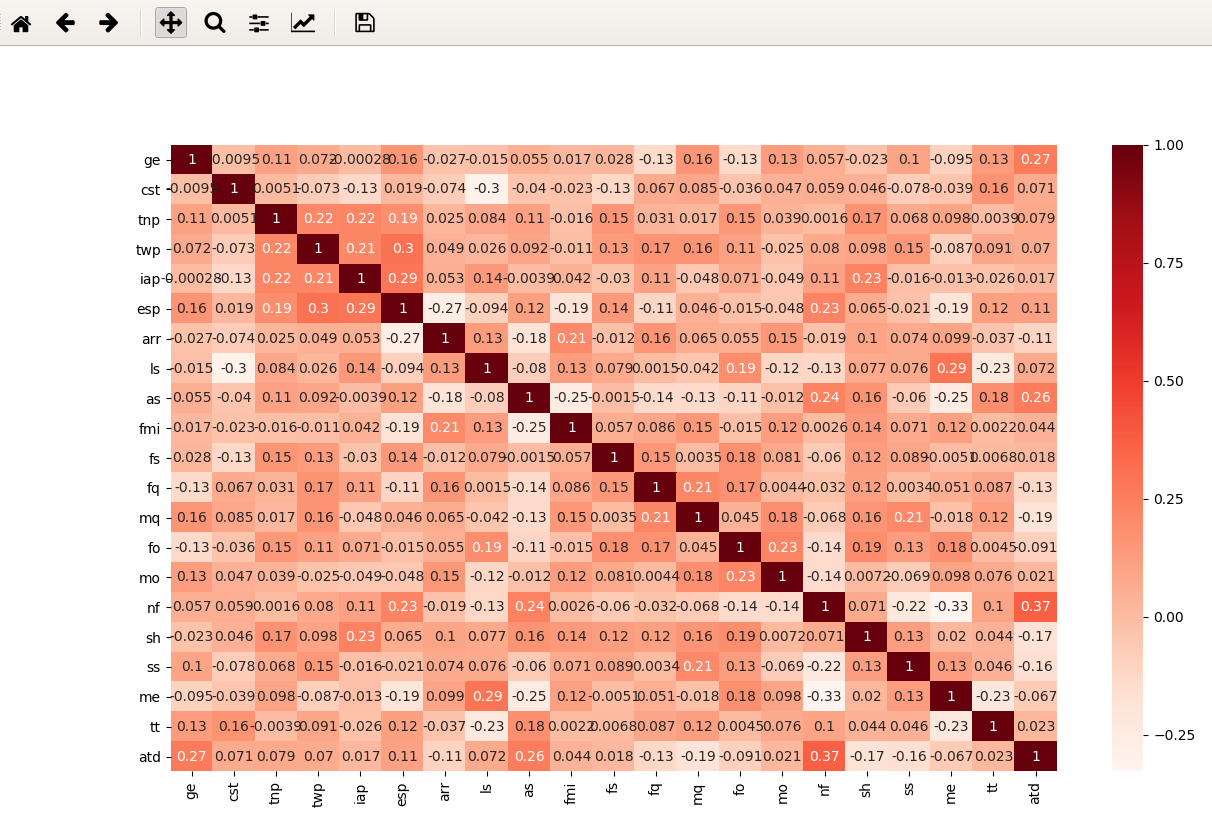

# Your answer here (code + explanation):








In [2]:
#(1) Description of all the columns: for each colmun, 
#count number of rows, 
#number of unqiue element,
#the frequency of each unqiue element.

import pandas as pd

df = pd.read_csv('lab-assignment-04-student-performance.csv')

#Count each number of rows
print("Count each number of rows \n\ncolumn|Number of rows \n")
print(df.count())

#Count number of unique element
print("\n\nNumber of unique element for each column:  \n\ncolumn|Number of rows \n")
print(df.nunique())

#the frequency of each unqiue element.
print("\n\nthe frequency of each unqiue element: ")
for col in df.columns:
    print("\nColumn name: " + col)
    print(df[col].value_counts())



Count each number of rows 

column|Number of rows 

ge     131
cst    131
tnp    131
twp    131
iap    131
esp    131
arr    131
ms     131
ls     131
as     131
fmi    131
fs     131
fq     131
mq     131
fo     131
mo     131
nf     131
sh     131
ss     131
me     131
tt     131
atd    131
dtype: int64


Number of unique element for each column:  

column|Number of rows 

ge     2
cst    5
tnp    4
twp    4
iap    4
esp    4
arr    2
ms     1
ls     2
as     2
fmi    5
fs     3
fq     6
mq     6
fo     5
mo     5
nf     3
sh     3
ss     2
me     4
tt     3
atd    3
dtype: int64


the frequency of each unqiue element: 

Column name: ge
M    72
F    59
Name: ge, dtype: int64

Column name: cst
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column name: tnp
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column name: twp
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column name: iap
Vg      63
Good    53
Best 

<AxesSubplot:>

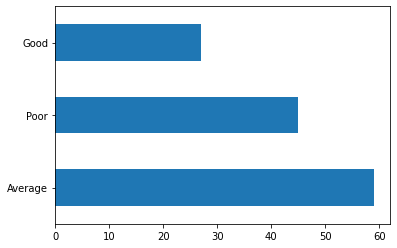

In [3]:
# (2) Visualize the count for each value in the 'Study Hours' column. 
## Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

df['sh'].value_counts().plot(kind='barh')


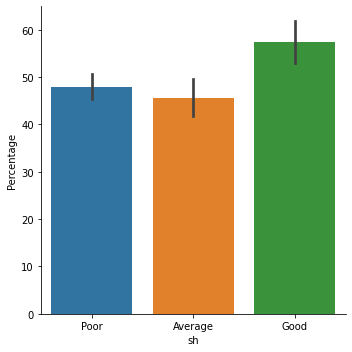

In [4]:
# 3) Using factorplot to show the relationship between numerical and categorical value. 
# Please use figure to show relation between [Study Hours] and [End Semester Percentage].
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#set give conditions and values
conditions = [
    (df['esp'] == "Best"),
    (df['esp'] == "Vg"),
    (df['esp'] == "Good"),
    (df['esp'] == "Pass"),
    (df['esp'] == "Fail"),
]

values = [80, 60, 45, 30, 28]

#create a new conditional column
df['Percentage'] = np.select(conditions, values)

#Visualize
sns.factorplot(x ='sh', y ='Percentage', data = df, kind ='bar')


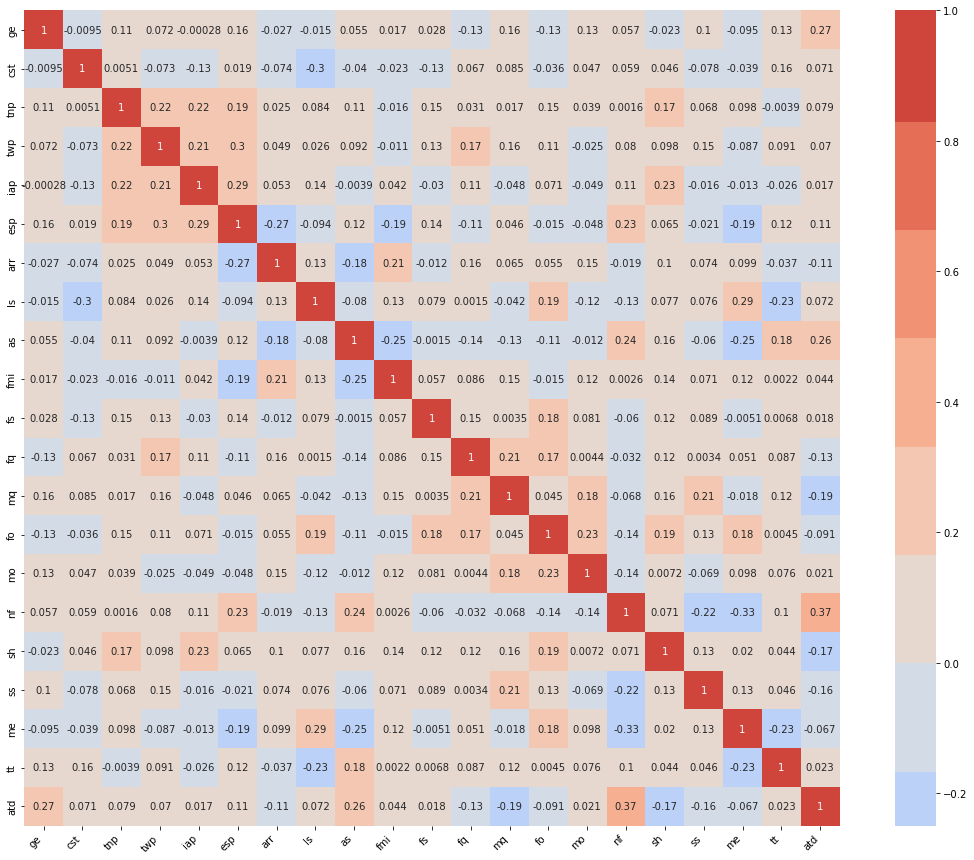

In [5]:
#(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('lab-assignment-04-student-performance.csv')

#Prepare data
df = df.drop('ms', axis = 1)
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

#Create correlation matrix.
corr = df.corr()

#Configure heat map
fig, ax = plt.subplots(figsize=(20,15))  
ax = sns.heatmap(
    corr, 
    annot = True,
    vmin=-0.25, vmax=1, center=0,
    cmap=sns.color_palette("coolwarm", 12),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
